# AWS EC2 instance types benchmarking for SE++

## Different instances family

### Instance types
| Type         | vCPU | Memory (GiB) | Storage (GB) | Price ($/h) | Cost ($/h/vCPU) |
| :----------: | :--: | :----------: | :----------: | :---------: | :-------------: |
| c5d.large    | 2    | 4            | 50           | 0.096       | 0.0480          |
| c7i.large    | 2    | 4            | -            | 0.0892      | 0.0445          |
| c6a.large    | 2    | 4            | -            | 0.0765      | 0.0382          |
| c6id.large   | 2    | 4            | 118          | 0.1008      | 0.0504          |
| c5d.4xlarge  | 16   | 32           | 400          | 0.768       | 0.0480          |
| c7i.4xlarge  | 16   | 32           | -            | 0.714       | 0.0445          |
| c6a.4xlarge  | 16   | 32           | -            | 0.612       | 0.0382          |
| c6a.12xlarge | 48   | 96           | -            | 1.836       | 0.0382          |
| c7i.48xlarge | 192  | 384          | -            | 8.568       | 0.0445          |
| c6a.48xlarge | 192  | 384          | -            | 7.344       | 0.0382          |

### Benchmark fields
| Size         | FOV       | Field | # Sources |
| :----------: | :-------: | :---: | :-------: |
| 0.25 arcsec² | 0.5"x0.5" | GDS   | 245       |
| 4.0 arcsec²  | 2.0"x2.0" | GDS   | 3609      |

### Results
| Instance     | 0.25 arcsec² | 4.0 arcsec² |
| :----------: | :----------: | :---------: |
| c5d.large    | 01h06m39s    | -           |
| c7i.large    | 00h47m51s    | -           |
| c6a.large    | 00h42m14s    | -           |
| c6id.large   | 00h56m11s    | -           |
| c7i.4xlarge  | -            | 02h15m00s $^{\ast}$ |
| c6a.4xlarge  | 00h13m39s    | 02h35m30s   |
| c6a.12xlarge | -            | 27% (~4xlarge) $^{\dagger}$ |
| c6a.48xlarge | -            | 6% (~4xlarge) $^{\dagger}$ |

*$^{\ast}$ Didn't finish completely (>99%)*

*$^{\dagger}$ Low CPU utilization, test not conducted until the end*

## Multi-threading and hyper-threading

| Instance | vCPU | thread_count | Size | # Sources | # Bands | Runtime | Max CPU | CPU time | Hyper thread |
| :------: | :--: | :----------: | :--: | :-------: | :-----: |:------: | :-----: | :------: | :----------: |
| c6a.8xlarge | 32 | 64 | 0.25 arcsec² | 450 | 2 | 00:07:40 | 18.4% | 00:30:05 | Y |
| c6a.8xlarge | 32 | 32 | 0.25 arcsec² | 451 | 2 | 00:07:37 | 16.9% | 00:29:21| Y |
| c6a.8xlarge | 32 | 16 | 0.25 arcsec² | 451 | 2 | 00:07:31 | 15.5% | 00:29:06 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcsec² | 449 | 2 | 00:06:44 | 16.7% | 00:27:36 | Y |
| c6a.8xlarge | 32 | 4 | 0.25 arcsec² | 451 | 2 | 00:07:57 | 10.8% | 00:27:16 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcsec² | 449 | 2 | 00:07:07 | 15.8% | 00:27:57 | N |
| c6a.8xlarge | 32 | 8 | 0.25 arcsec² | 449 | 4 | 00:11:11 | 22.2% | 00:55:20 | N |
| c6a.8xlarge | 32 | 16 | 0.25 arcsec² | 450 | 4 | 00:11:37 | 19.0% | 00:58:37 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcsec² | 450 | 4 | 00:11:26 | 23.5% | 00:56:24 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcsec² | 450 | 8 | 00:24:51 | 25.0% | 02:08:44 | Y |
| c6a.8xlarge | 32 | 16 | 0.25 arcsec² | 450 | 8 | 00:20:24 | 46.6% | 02:09:41 | Y |
| c6a.8xlarge | 32 | 32 | 0.25 arcsec² | 450 | 8 | 00:21:09 | 49.3% | 02:21:19 | Y |
| c6a.8xlarge | 32 | 16 | 0.25 arcsec² | 450 | 16 | 00:08:43 | 9.1% | 00:19:34 | Y |
| c6a.8xlarge | 32 | 32 | 0.25 arcsec² | 450 | 16 | 00:08:22 | 8.9% | 00:19:15 | Y |
| c6a.8xlarge | 32 | 64 | 0.25 arcsec² | 450 | 16 | 00:09:00 | 8.4% | 00:20:08 | Y |
| c6a.4xlarge | 16 | 2 | 0.25 arcsec² | 450 | 16 | 00:09:42 | 12.1% | 00:17:06 | Y |
| c6a.4xlarge | 16 | 4 | 0.25 arcsec² | 451 | 16 | 00:07:23 | 17.9% | 00:17:29 | Y |
| c6a.4xlarge | 16 | 8 | 0.25 arcsec² | 451 | 16 | 00:07:30 | 20.1% | 00:18:12 | Y |
| c6a.4xlarge | 16 | 16 | 0.25 arcsec² | 451 | 16 | 00:07:52 | 18.9% | 00:19:17 | Y |
| c6a.4xlarge | 16 | 32 | 0.25 arcsec² | 450 | 16 | 00:08:02 | 15.0% | 00:19:10 | Y |
| c6a.4xlarge | 16 | 64 | 0.25 arcsec² | 450 | 16 | 00:08:12 | 10.1% | 00:19:38 | Y |
| c6a.4xlarge | 16 | 4 | 1.0 arcsec² | 1573 | 16 | 00:29:40 | 25.2% | 01:21:45 | Y |
| c6a.4xlarge | 16 | 8 | 1.0 arcsec² | 1570 | 16 | 00:26:52 | 41.2% | 01:24:43 | Y |
| c6a.4xlarge | 16 | 16 | 1.0 arcsec² | 1570 | 16 | 00:30:20 | 67.0% | 01:32:08 | Y |
| c6a.4xlarge | 16 | 4 | 1.0 arcsec² | 1572 | 8 | 02:20:40 | 24.8% | 08:42:12 | Y |

#### Stopped before end
| Instance | vCPU | thread_count | Size | # Sources | # Bands | Runtime | Max CPU | CPU time | Hyper thread | Max MEM | Run % | Expected end |
| :------: | :--: | :----------: | :--: | :-------: | :-----: |:------: | :-----: | :------: | :---------: | :-----: | :---: | :----------: |
| c6a.8xlarge | 32 | 32 | 4.0 arcsec² | 6110 | 16 | 03:04:32 | 98.2% | 53:46:18 | Y | 33% | 54.62% | 05:37:51 |
| c6a.4xlarge | 16 | 8 | 4.0 arcsec² | 6108 | 16 | 01:08:41 | 51.1% | 08:39:08 | Y | 40 % | 12.07% | 09:29:02 |
| c6a.4xlarge | 16 | 32 | 4.0 arcsec² | 6108 | 16 | 00:53:33 | 100% | 12:46:12 | Y | 50 % | 12.61% | 07:04:39 |
| c6a.4xlarge | 16 | 128 | 4.0 arcsec² | 6112 | 16 | 00:57:41 | 100% | 13:53:10 | Y | 75 % | 14.38% | 06:41:08 |
| c6a.4xlarge | 16 | 256 | 4.0 arcsec² | 6112 | 16 | 00:41:29 | 100% | 09:55:35 | Y | 83 % | 9.35% | 07:23:40 |

### Plots

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

plt.rcParams['xtick.labelsize']='large'
plt.rcParams['ytick.labelsize']='large'
plt.rcParams['axes.labelsize']='x-large'
plt.rcParams['legend.fontsize']='large'
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.right']=True
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True

In [3]:
table = """| Instance | vCPU | thread_count | Size | # Sources | # Bands | Runtime | Max CPU | CPU time | Hyper thread |
| :------: | :--: | :----------: | :--: | :-------: | :-----: |:------: | :-----: | :------: | :----------: |
| c6a.8xlarge | 32 | 64 | 0.25 arcsec² | 450 | 2 | 00:07:40 | 18.4% | 00:30:05 | Y |
| c6a.8xlarge | 32 | 32 | 0.25 arcsec² | 451 | 2 | 00:07:37 | 16.9% | 00:29:21| Y |
| c6a.8xlarge | 32 | 16 | 0.25 arcsec² | 451 | 2 | 00:07:31 | 15.5% | 00:29:06 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcsec² | 449 | 2 | 00:06:44 | 16.7% | 00:27:36 | Y |
| c6a.8xlarge | 32 | 4 | 0.25 arcsec² | 451 | 2 | 00:07:57 | 10.8% | 00:27:16 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcsec² | 449 | 2 | 00:07:07 | 15.8% | 00:27:57 | N |
| c6a.8xlarge | 32 | 8 | 0.25 arcsec² | 449 | 4 | 00:11:11 | 22.2% | 00:55:20 | N |
| c6a.8xlarge | 32 | 16 | 0.25 arcsec² | 450 | 4 | 00:11:37 | 19.0% | 00:58:37 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcsec² | 450 | 4 | 00:11:26 | 23.5% | 00:56:24 | Y |
| c6a.8xlarge | 32 | 8 | 0.25 arcsec² | 450 | 8 | 00:24:51 | 25.0% | 02:08:44 | Y |
| c6a.8xlarge | 32 | 16 | 0.25 arcsec² | 450 | 8 | 00:20:24 | 46.6% | 02:09:41 | Y |
| c6a.8xlarge | 32 | 32 | 0.25 arcsec² | 450 | 8 | 00:21:09 | 49.3% | 02:21:19 | Y |
| c6a.8xlarge | 32 | 16 | 0.25 arcsec² | 450 | 16 | 00:08:43 | 9.1% | 00:19:34 | Y |
| c6a.8xlarge | 32 | 32 | 0.25 arcsec² | 450 | 16 | 00:08:22 | 8.9% | 00:19:15 | Y |
| c6a.8xlarge | 32 | 64 | 0.25 arcsec² | 450 | 16 | 00:09:00 | 8.4% | 00:20:08 | Y |
| c6a.4xlarge | 16 | 2 | 0.25 arcsec² | 450 | 16 | 00:09:42 | 12.1% | 00:17:06 | Y |
| c6a.4xlarge | 16 | 4 | 0.25 arcsec² | 451 | 16 | 00:07:23 | 17.9% | 00:17:29 | Y |
| c6a.4xlarge | 16 | 8 | 0.25 arcsec² | 451 | 16 | 00:07:30 | 20.1% | 00:18:12 | Y |
| c6a.4xlarge | 16 | 16 | 0.25 arcsec² | 451 | 16 | 00:07:52 | 18.9% | 00:19:17 | Y |
| c6a.4xlarge | 16 | 32 | 0.25 arcsec² | 450 | 16 | 00:08:02 | 15.0% | 00:19:10 | Y |
| c6a.4xlarge | 16 | 64 | 0.25 arcsec² | 450 | 16 | 00:08:12 | 10.1% | 00:19:38 | Y |
| c6a.4xlarge | 16 | 4 | 1.0 arcsec² | 1573 | 16 | 00:29:40 | 25.2% | 01:21:45 | Y |
| c6a.4xlarge | 16 | 8 | 1.0 arcsec² | 1570 | 16 | 00:26:52 | 41.2% | 01:24:43 | Y |
| c6a.4xlarge | 16 | 16 | 1.0 arcsec² | 1570 | 16 | 00:30:20 | 67.0% | 01:32:08 | Y |
| c6a.4xlarge | 16 | 4 | 1.0 arcsec² | 1572 | 8 | 02:20:40 | 24.8% | 08:42:12 | Y |"""

def str2data(string, type):
    string = string.strip()
    match type:
        case "p": # Percentage (with % sign)
            return float(string[:-1])/100
        case "i": # Integer
            return int(''.join(c for c in string if c.isdigit()))
        case "f": # Float
            return float(''.join(c for c in string if c.isdigit()))
        case "u": # Unit quantity (space between value and unit)
            return float(string.split(" ")[0])
        case "t": # Time (%H:%M:%S)
            # return datetime.strptime(string, "%H:%M:%S").time()
            return pd.to_timedelta(string).seconds
        case "s": # String
            return string
        case "b": # Boolean
            return string in ["Y","y","True","1"]
    return string

def parse_table(table, types):
    lines = table.split("\n")
    header = [name.strip() for name in lines[0].split("|")[1:-1]]
    data = []
    for line in lines[2:]:
        col = [str2data(pt, types[i]) for i,pt in enumerate(line.split("|")[1:-1])]
        data.append(col)
    df = pd.DataFrame(data, columns=header)
    # for i in range(len(types)):
    #     if types[i]=="t":
    #         df.iloc[:,i] = pd.to_timedelta(df.iloc[:,i])
    return df

benchmark = parse_table(table, ["s","i","i","u","i","i","t","p","t","b"])
benchmark

,Instance,vCPU,thread_count,Size,# Sources,# Bands,Runtime,Max CPU,CPU time,Hyper thread
0,c6a.8xlarge,32,64,0.25,450,2,460,0.184,1805,True
1,c6a.8xlarge,32,32,0.25,451,2,457,0.169,1761,True
2,c6a.8xlarge,32,16,0.25,451,2,451,0.155,1746,True
3,c6a.8xlarge,32,8,0.25,449,2,404,0.167,1656,True
4,c6a.8xlarge,32,4,0.25,451,2,477,0.108,1636,True
5,c6a.8xlarge,32,8,0.25,449,2,427,0.158,1677,False
6,c6a.8xlarge,32,8,0.25,449,4,671,0.222,3320,False
7,c6a.8xlarge,32,16,0.25,450,4,697,0.190,3517,True
8,c6a.8xlarge,32,8,0.25,450,4,686,0.235,3384,True
9,c6a.8xlarge,32,8,0.25,450,8,1491,0.250,7724,True


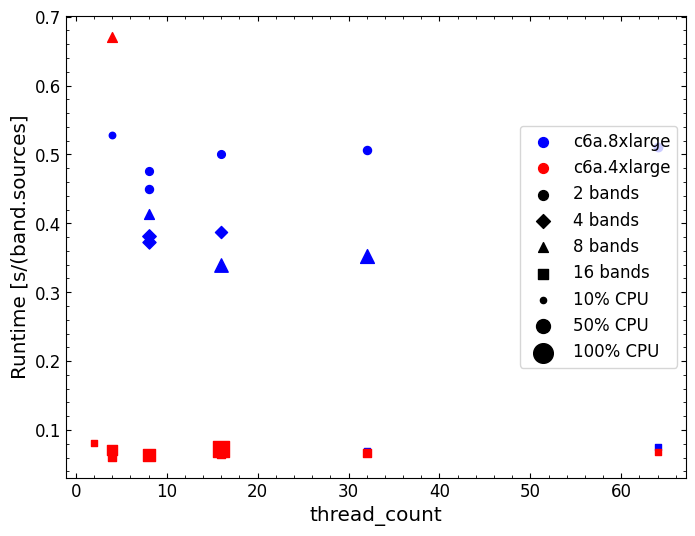

In [7]:
fig, ax = plt.subplots(figsize=(8,6))

color_dict = {'c6a.8xlarge':'b', 'c6a.4xlarge':'r'}
colors = [color_dict[i] for i in benchmark['Instance']]
mark_dict = {2:'o', 4:'D', 8:'^', 16:'s'}
markers = [mark_dict[b] for b in benchmark['# Bands']]
sizes = 200*benchmark['Max CPU']

X = benchmark['thread_count']
Y = benchmark['Runtime']/(benchmark['# Bands']*benchmark['# Sources'])

for i in range(len(benchmark)):
    ax.scatter(X[i], Y[i], s=sizes[i], c=colors[i], marker=markers[i], label="_")

ax.set_ylabel("Runtime [s/(band.sources]")
ax.set_xlabel("thread_count")

# Legend
ax.scatter([],[],c='b',s=50,marker='o',label="c6a.8xlarge")
ax.scatter([],[],c='r',s=50,marker='o',label="c6a.4xlarge")
for band in mark_dict:
    ax.scatter([],[],c='k',s=50,marker=mark_dict[band],label=f"{band} bands")
for cpu in [0.1, 0.5, 1.0]:
    ax.scatter([],[],c='k',s=200*cpu,marker='o',label=f"{cpu*100.0:.0f}% CPU")

# ax.set_ylim(0.0,0.1)
ax.legend(loc='right')

plt.show()